# Artificial Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
 import numpy as np
 import pandas as pd
 import tensorflow as tf
 tf.__version__

'2.2.0'

### Importing the dataset

In [ ]:
dataset = pd.read_excel('TBL_NAME.xls')
X = dataset.iloc[:, [1,2,3,4,5,6, 7,8,9,10,11,12]].values
y = dataset.iloc[:, -1].values
print(y)

[100 100 100 ... 100 100 100]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)
print(X_test )

[[-0.62579778 -0.49417838 -0.60974984 ... -0.97652294 -0.68284506
  -0.72542398]
 [-0.62579778 -0.49417838 -0.60974984 ... -0.97652294 -0.68284506
  -0.72542398]
 [ 3.81298344 -0.49417838 -0.60974984 ... -0.97652294 -0.67937879
  -0.72225733]
 ...
 [-0.62579778 -0.49417838 -0.60974984 ... -0.97652294 -0.68284506
  -0.72542398]
 [-0.62579778 -0.49417838 -0.60974984 ... -0.97652294 -0.68284506
  -0.72542398]
 [-0.62579778 -0.49417838 -0.60974984 ... -0.97652294 -0.68284506
  -0.72542398]]


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
219/219 [==============================] - 0s 1ms/step - loss: 6741.0649
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 3929.3142
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 575.3915
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 171.3798
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 78.1332
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 45.0041
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 31.7699
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 24.5574
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 19.9774
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 16.6808
Epoch 11/100
219/219 [==============================] - 0s 1ms/step - loss: 14.1446
Epoch 12/100
219/219 [==============================] - 0s 1ms/step - loss: 12.

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[100.01 100.  ]
 [100.01 100.  ]
 [ 79.6   80.  ]
 ...
 [100.02 100.  ]
 [100.01 100.  ]
 [100.01 100.  ]]


In [ ]:
print(y_pred )


[[100.01]
 [100.01]
 [ 79.6 ]
 ...
 [100.02]
 [100.01]
 [100.01]]


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.3313246421149355
0.33319575323112144


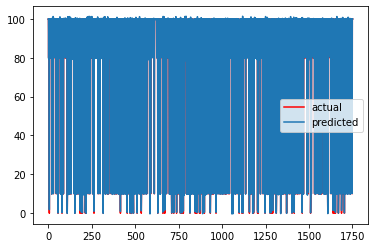

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='actual', color='red')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

In [ ]:
dataset1 = pd.read_excel('Book2.xlsx')
Xy = dataset1.iloc[:, [1,2,3,4,5,6, 7,8,9,10,11,12]].values

Y=dataset1.iloc[:, - 1].values
np.set_printoptions(suppress=True)
print(Y)
print(Xy)

[ 10  10  80  80  80 100 100 100 100 100 100 100 100 100 100 100 100 100
  80  80  80  10  10   0  10  10  80  80  80 100 100 100 100 100 100 100
 100 100 100 100 100 100  80  80  80  10  10   0  10  10  80  80  80 100
 100 100 100 100 100 100 100 100 100 100 100 100  80  80  80  10  10   0
  10  10  80  80  80 100 100 100 100 100 100 100 100 100 100 100 100 100
  80  80  80  10  10   0  10  10  80]
[[  1.68   0.73   0.85 ...  38.46 655.99 699.85]
 [  1.95   0.58   0.68 ...  38.9  548.36 583.27]
 [  2.62   0.07   0.34 ...  39.42 229.1  371.36]
 ...
 [  1.65   0.82   0.96 ...  38.   686.97 736.43]
 [  1.92   0.65   0.77 ...  38.46 576.37 615.82]
 [  2.55   0.09   0.46 ...  39.08 241.78 431.2 ]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
Xy=sc_x.fit_transform(Xy)
print(Xy )

[[-0.04  1.73  1.68 ...  1.15  1.8   1.72]
 [ 0.06  1.26  1.2  ...  1.17  1.39  1.31]
 [ 0.3  -0.36  0.28 ...  1.2   0.19  0.57]
 ...
 [-0.05  2.03  1.98 ...  1.12  1.91  1.85]
 [ 0.05  1.5   1.44 ...  1.15  1.5   1.42]
 [ 0.28 -0.29  0.6  ...  1.18  0.24  0.78]]


In [ ]:
y1_pred = ann.predict(Xy)
np.set_printoptions(precision=2)
print(y1_pred)

[[ 15.66]
 [ 15.23]
 [ 83.97]
 [ 84.07]
 [ 81.21]
 [102.51]
 [102.53]
 [102.55]
 [102.57]
 [102.59]
 [102.6 ]
 [102.62]
 [102.63]
 [102.64]
 [102.65]
 [102.66]
 [102.67]
 [102.67]
 [ 82.45]
 [ 83.67]
 [ 83.59]
 [ 15.09]
 [ 15.4 ]
 [  5.88]
 [ 15.7 ]
 [ 15.37]
 [ 84.15]
 [ 84.33]
 [ 81.26]
 [102.49]
 [102.51]
 [102.53]
 [102.54]
 [102.55]
 [102.56]
 [102.58]
 [102.59]
 [102.6 ]
 [102.61]
 [102.62]
 [102.63]
 [102.64]
 [ 82.53]
 [ 83.7 ]
 [ 84.1 ]
 [ 15.76]
 [ 16.34]
 [  6.87]
 [ 16.38]
 [ 15.82]
 [ 84.4 ]
 [ 84.42]
 [ 81.26]
 [102.49]
 [102.5 ]
 [102.52]
 [102.54]
 [102.55]
 [102.57]
 [102.58]
 [102.59]
 [102.61]
 [102.62]
 [102.63]
 [102.64]
 [102.65]
 [ 82.52]
 [ 83.51]
 [ 84.11]
 [ 15.85]
 [ 16.44]
 [  6.96]
 [ 16.49]
 [ 15.95]
 [ 84.6 ]
 [ 84.6 ]
 [ 81.32]
 [102.46]
 [102.48]
 [102.5 ]
 [102.52]
 [102.54]
 [102.55]
 [102.57]
 [102.58]
 [102.6 ]
 [102.61]
 [102.62]
 [102.63]
 [102.64]
 [ 82.54]
 [ 83.52]
 [ 83.83]
 [ 15.34]
 [ 15.88]
 [  6.35]
 [ 15.95]
 [ 15.51]
 [ 84.34]]


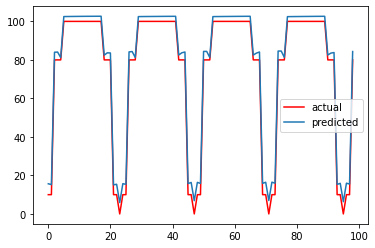

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y, label='actual', color='red')
plt.plot(y1_pred, label='predicted')
plt.legend()
plt.show()